# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


---

In [3]:
#TEST CODE WITH ONE PARTICULAR CITY
url = "https://api.openweathermap.org/data/2.5/weather?"
units='metric'

city_url = f"{url}appid={weather_api_key}&units={units}&q=London"
city_url


weather_response=requests.get(city_url)
weather_json=weather_response.json()

weather_json

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 721,
   'main': 'Haze',
   'description': 'haze',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 5.04,
  'feels_like': 2.89,
  'temp_min': 2.1,
  'temp_max': 6.86,
  'pressure': 1009,
  'humidity': 83},
 'visibility': 5000,
 'wind': {'speed': 2.57, 'deg': 210},
 'clouds': {'all': 58},
 'dt': 1711325816,
 'sys': {'type': 2,
  'id': 2091269,
  'country': 'GB',
  'sunrise': 1711345857,
  'sunset': 1711390897},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [6]:
#TEST CODE WITH ONE PARTICULAR CITY
city_lat_test = weather_json['coord']['lat']
city_lng_test = weather_json['coord']['lon']
city_max_temp_test = weather_json['main']['temp_max']
city_humidity_test = weather_json['main']['humidity']
city_clouds_test = weather_json['clouds']['all']
city_wind_test = weather_json['wind']['speed']
city_country_test=weather_json['sys']['country']
city_date_test=weather_json['dt']

print(city_lat_test) 
print(city_lng_test)
print(city_max_temp_test)
print(city_humidity_test) 
print(city_clouds_test) 
print(city_wind_test) 
print(city_country_test)
print(city_date_test)

51.5085
-0.1257
6.86
83
58
2.57
GB
1711325816


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units='metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url)
        city_weather_json=city_weather.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country=city_weather_json['sys']['country']
        city_date=city_weather_json['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | muar
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | plettenberg bay
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | leh
Processing Record 12 of Set 1 | shakawe
Processing Record 13 of Set 1 | kifri
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | itaituba
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | puerto natales

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muar,2.0442,102.5689,28.35,84,99,2.76,MY,1711328576
1,albany,42.6001,-73.9662,-1.91,74,16,1.52,US,1711328433
2,ushuaia,-54.8000,-68.3000,7.81,81,0,5.14,AR,1711328406
3,stanley,54.8680,-1.6985,3.40,93,0,0.51,GB,1711328579
4,waitangi,-43.9535,-176.5597,17.12,89,5,1.79,NZ,1711328580


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_2.csv", index_label="City_ID")



In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_2.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muar,2.0442,102.5689,28.35,84,99,2.76,MY,1711328576
1,albany,42.6001,-73.9662,-1.91,74,16,1.52,US,1711328433
2,ushuaia,-54.8000,-68.3000,7.81,81,0,5.14,AR,1711328406
3,stanley,54.8680,-1.6985,3.40,93,0,0.51,GB,1711328579
4,waitangi,-43.9535,-176.5597,17.12,89,5,1.79,NZ,1711328580


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

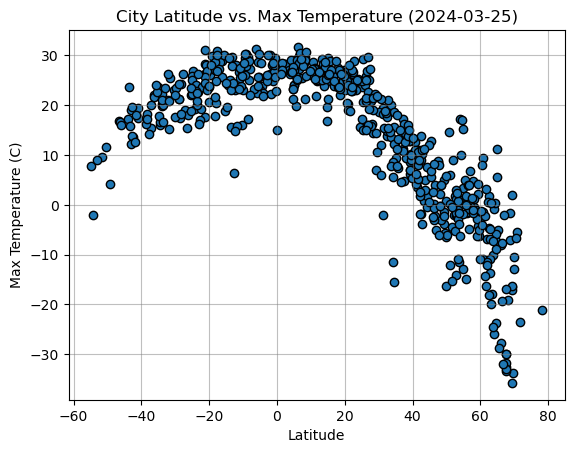

In [48]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")
formatted_date = pd.to_datetime(city_date,unit='s').strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Max Temperature ({formatted_date})')
plt.grid(True, linestyle='-', color='gray', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

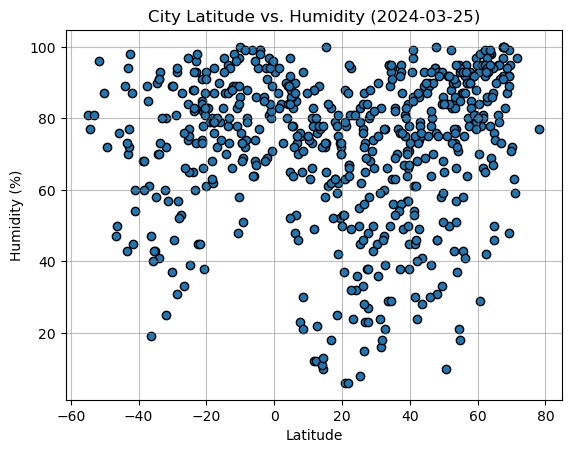

In [50]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
formatted_date = pd.to_datetime(city_date,unit='s').strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Humidity ({formatted_date})')
plt.grid(True, linestyle='-', color='gray', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

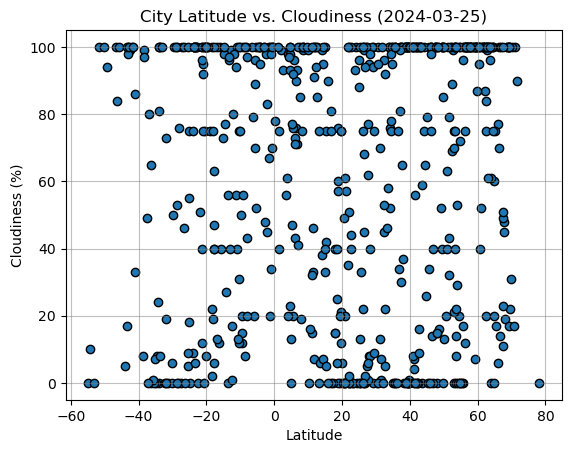

In [56]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
formatted_date = pd.to_datetime(city_date,unit='s').strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Cloudiness ({formatted_date})')
plt.grid(True, linestyle='-', color='gray', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

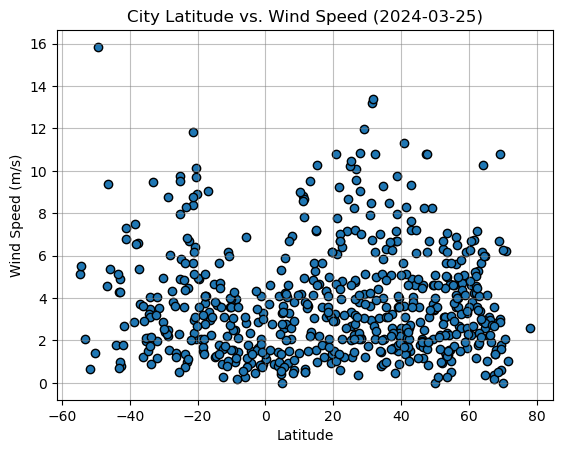

In [58]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
formatted_date = pd.to_datetime(city_date,unit='s').strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Wind Speed ({formatted_date})')
plt.grid(True, linestyle='-', color='gray', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


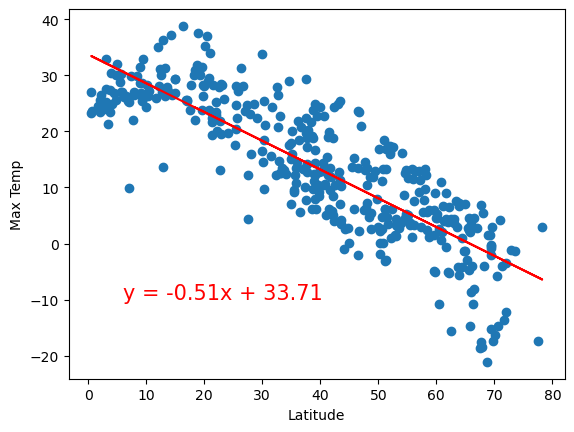

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


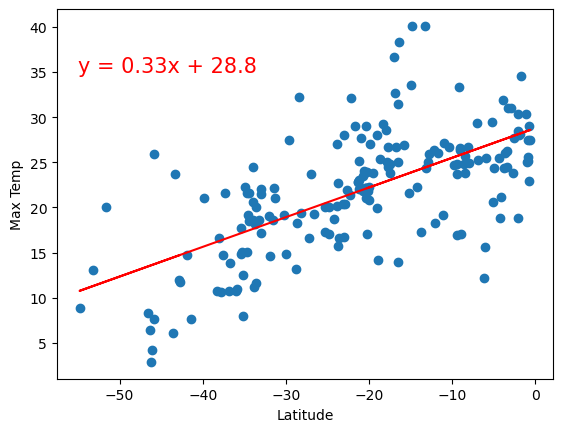

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


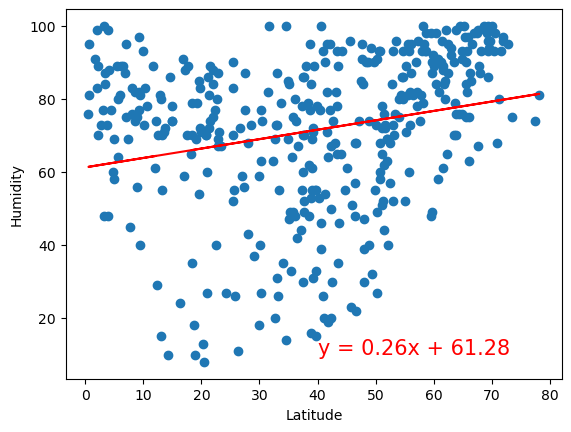

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


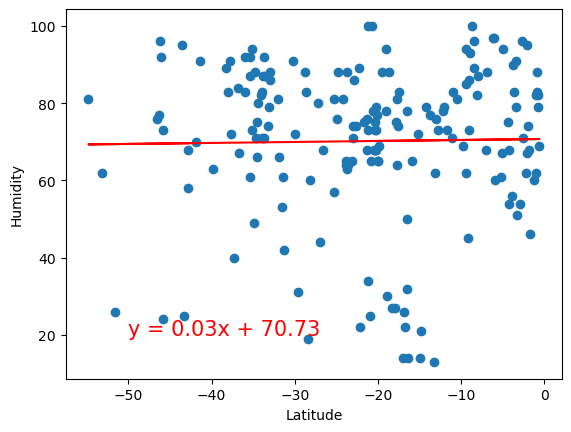

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


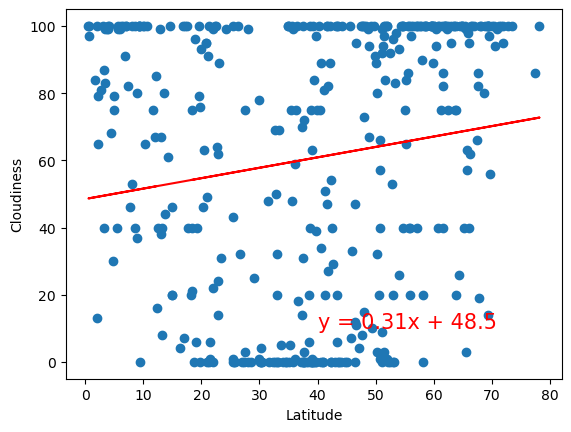

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


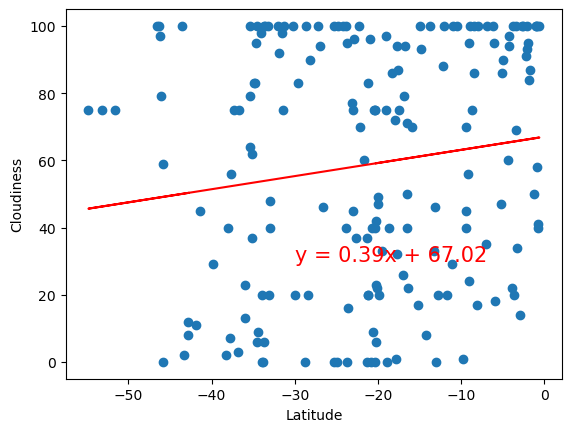

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


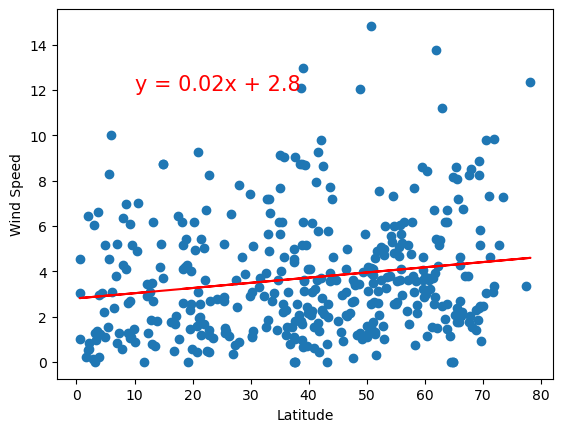

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


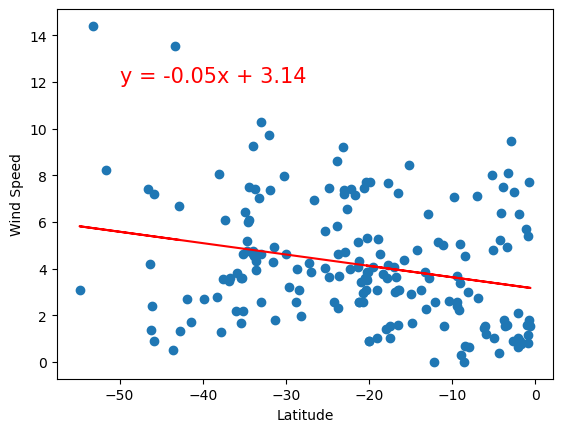

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE